In [1]:
from keras.applications import vgg16
from keras.models import Model
import keras

img_width, img_height = 128, 128
input_shape=(img_width, img_height,3)
batch_size = 32

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)



Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [2]:
import pandas as pd
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])   

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at...,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0...,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0...,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0...,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0...,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0...,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0...,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0...,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0...,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0...,block3_conv3,False


In [3]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import tensorflow 

from tensorflow import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

In [4]:
base_dir = 'D:\\project_235C_dataset\\resource\\dataset_label'
train_data_dir = os.path.join(base_dir, 'train_data')
validation_data_dir = os.path.join(base_dir, 'Validation')
test_data_dir = os.path.join(base_dir, 'Testing')
test_dir = os.path.join(base_dir, 'Testing')
test_dir_pos = os.path.join(test_dir, 'positive')
test_dir_neg = os.path.join(test_dir, 'negative')


In [5]:
image_data_generator=ImageDataGenerator(
                        rescale=1./255,   #normalization
                        shear_range=0.2,
                        zoom_range=0.2,  # Randomly zoom image  
                        horizontal_flip=True)  #horizontally flip images

#generate the train data generator
train_generator=image_data_generator.flow_from_directory(train_data_dir, 
                                                 target_size=(img_width, img_height),
                                                 batch_size=batch_size,
                                                 class_mode='binary',
                                                 shuffle=True)

Found 1441 images belonging to 2 classes.


In [6]:
valid_datagenerator = ImageDataGenerator(rescale=1./255)
validation_generator = valid_datagenerator.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 494 images belonging to 2 classes.


In [7]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=train_generator.n//train_generator.batch_size, epochs=30,
                              validation_data=validation_generator, validation_steps=validation_generator.n//validation_generator.batch_size, 
                              verbose=1)  

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
45/45 [==============================] - 720s 16s/step - loss: 0.4046 - accuracy: 0.8261 - val_loss: 0.1037 - val_accuracy: 0.8417
Epoch 2/30
45/45 [==============================] - 806s 18s/step - loss: 0.2923 - accuracy: 0.8772 - val_loss: 0.3170 - val_accuracy: 0.9069
Epoch 3/30
45/45 [==============================] - 775s 17s/step - loss: 0.2462 - accuracy: 0.9084 - val_loss: 0.1400 - val_accuracy: 0.9113
Epoch 4/30
45/45 [==============================] - 709s 16s/step - loss: 0.2136 - accuracy: 0.9141 - val_loss: 0.1309 - val_accuracy: 0.9372
Epoch 5/30
45/45 [==============================] - 686s 15s/step - loss: 0.1749 - accuracy: 0.9269 - val_loss: 0.1158 - val_accuracy: 0.9113
Epoch 6/30
45/45 [==============================] - 556s 12s/step - loss: 0.1390 - accuracy: 0.9510 - val_loss: 0.3568 - val_accuracy: 0.9329
Epoch 7/30
45/45 [==============================] - 529s 12s/step - loss: 0.1284 - accuracy: 0.9588 

In [8]:
model.save('pothole_finetune_img_vgg_cnn.h5')

Text(0.5,1,'Training and Validation loss')

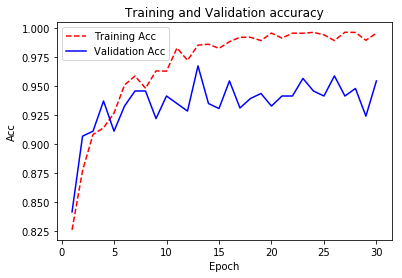

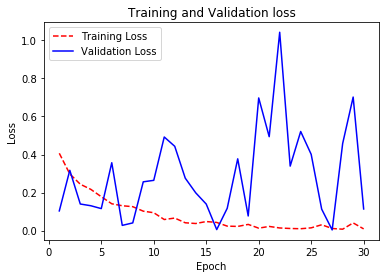

In [9]:
# generate the accuracy and loss for each training epoch
training_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

training_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_count = range(1, len(training_acc) + 1)

plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-')
plt.legend(['Training Acc', 'Validation Acc'])
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.title('Training and Validation accuracy')
plt.figure()

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation loss')


Evaluation of the model

In [12]:
#model evaluation
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.models import load_model
import model_evaluation_utils as meu
%matplotlib inline

# load saved models
#basic_cnn = load_model('pothole_img_cnn.h5')
vgg16_cnn = load_model('pothole_finetune_img_aug_cnn.h5')

In [13]:
IMG_DIM = (128, 128)
input_shape_2 = (128, 128, 3)
num2class_label_transformer = lambda l: ['not pothole' if x == 0 else 'pothole' for x in l]
class2num_label_transformer = lambda l: [1 if x.endswith('p') or x.startswith('extra') else 0 for x in l]


In [14]:
test_files =glob.glob("D:\\project_235C_dataset\\resource\\dataset_label\\test\\*")
test_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_files]
test_imgs = np.array(test_imgs)
test_labels = [fn.split('\\')[-1].split('.')[0].strip() for fn in test_files]

test_imgs_scaled = test_imgs.astype('float32')
test_imgs_scaled /= 255
test_labels_enc = class2num_label_transformer(test_labels)

print('Test dataset shape:', test_imgs.shape)
print(test_labels[0:5], test_labels_enc[0:5])

Test dataset shape: (409, 128, 128, 3)
['10n', '10p', '11n', '11p', '12n'] [0, 1, 0, 1, 0]


In [15]:
classes=list(set(num2class_label_transformer(test_labels_enc)))
print(classes)
predictions = vgg16_cnn.predict_classes(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)
meu.display_model_performance_metrics(true_labels=num2class_label_transformer(test_labels_enc), predicted_labels=predictions, 
                                      classes=list(sorted(set(num2class_label_transformer(test_labels_enc)),reverse = True)))


['pothole', 'not pothole']
Model Performance metrics:
------------------------------
Accuracy: 0.8509
Precision: 0.8673
Recall: 0.8509
F1 Score: 0.8541

Model Classification report:
------------------------------
             precision    recall  f1-score   support

    pothole       0.94      0.83      0.88       275
not pothole       0.72      0.89      0.80       134

avg / total       0.87      0.85      0.85       409


Prediction Confusion Matrix:
------------------------------
                    Predicted:            
                       pothole not pothole
Actual: pothole            229          46
        not pothole         15         119


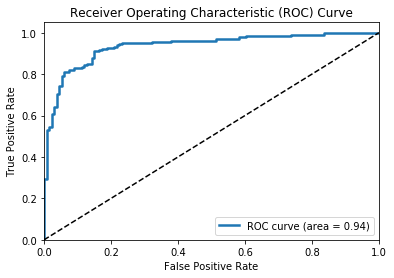

In [16]:
meu.plot_model_roc_curve(vgg16_cnn, test_imgs_scaled, 
                         true_labels=test_labels_enc, 
                         class_names=[0, 1]) 

(1, 128, 128, 3)
[[1.]]
	class: pothole


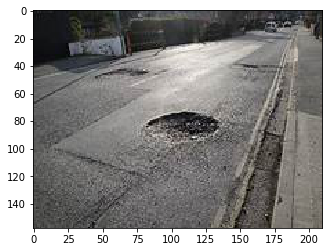

In [18]:
from PIL import ImageFile
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.image as mpimg

#predict positive image
test_path = os.path.join(test_dir_pos, '1p.jpg')
image = load_img(test_path, target_size=(128,128))
image_arr = img_to_array(image) # convert from Image to NumPy array
image_arr = np.expand_dims(image_arr, axis=0)
print(image_arr.shape)

image_arr /= 255
prediction_array = model.predict(image_arr)
print(prediction_array)

img = mpimg.imread(test_path)
plt.imshow(img)
if prediction_array[0][0] > 0.3:
    print("\tclass: pothole")
else: 
    print("\tclass: not pothole")

(1, 128, 128, 3)
[[3.391571e-05]]

	class: not pothole


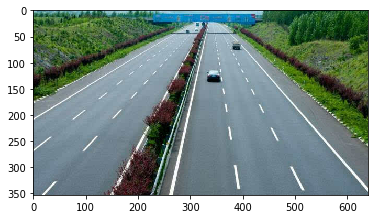

In [19]:
#predict negatvie image
test_path = os.path.join(test_dir_neg, '16n.jpg')
image = load_img(test_path, target_size=(128,128))
image_arr = img_to_array(image) 
image_arr = np.expand_dims(image_arr, axis=0)
print(image_arr.shape)

image_arr /= 255
prediction_array = model.predict(image_arr)
print(prediction_array)
print()

testpath = os.path.join(test_dir_neg, '16n.jpg')
img = mpimg.imread(testpath)
plt.imshow(img)
if prediction_array[0][0] > 0.3:
    print("\tclass: pothole")
else: 
    print("\tclass: not pothole")